# Reto 2: Datalab ITAM

En el presente libro se encuentra el desarrollo de nuestra solución. Habrá distintos apartados en el que mostramos el pipeline de análisis que desarrollamos. 

## Integrantes: 
* Majo Castañeda
* Dante Bazaldua
* Valentina Mancera

# Parte 1
---

Extracción de datos utilizando tesseract

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
in_dir = 'drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2'

In [3]:
import PIL

from glob import glob
from random import sample

def get_width_and_height(file_name):
    image = PIL.Image.open(file_name)
    return image.size
    
files = glob(in_dir+'/*')
print("Hay " + str(len(files)) + " archivos en el directorio")
files_sample = sample(files, 10)

for file_name in files_sample:
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)

Hay 10 archivos en el directorio
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_Union_Campesina_Independiente,_fichas_UCI,_fichas-2-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_PPUA_Fichas_PPUA,_Fichas-98-.JPG
2304 1728 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_Detenidos_Desaparecidos_Morales_Lopez_Delia_Morales_Lopez_Delia-23-.JPG
2304 1728 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-113-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_Detenidos_Desaparecidos_Perez_Lopez_Martha_Perez_Lopez_Martha-21-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_Olea_Castaneyra_Rafael,_ACNR-19-.JPG
4608 3456 drive/MyDrive/Datos -

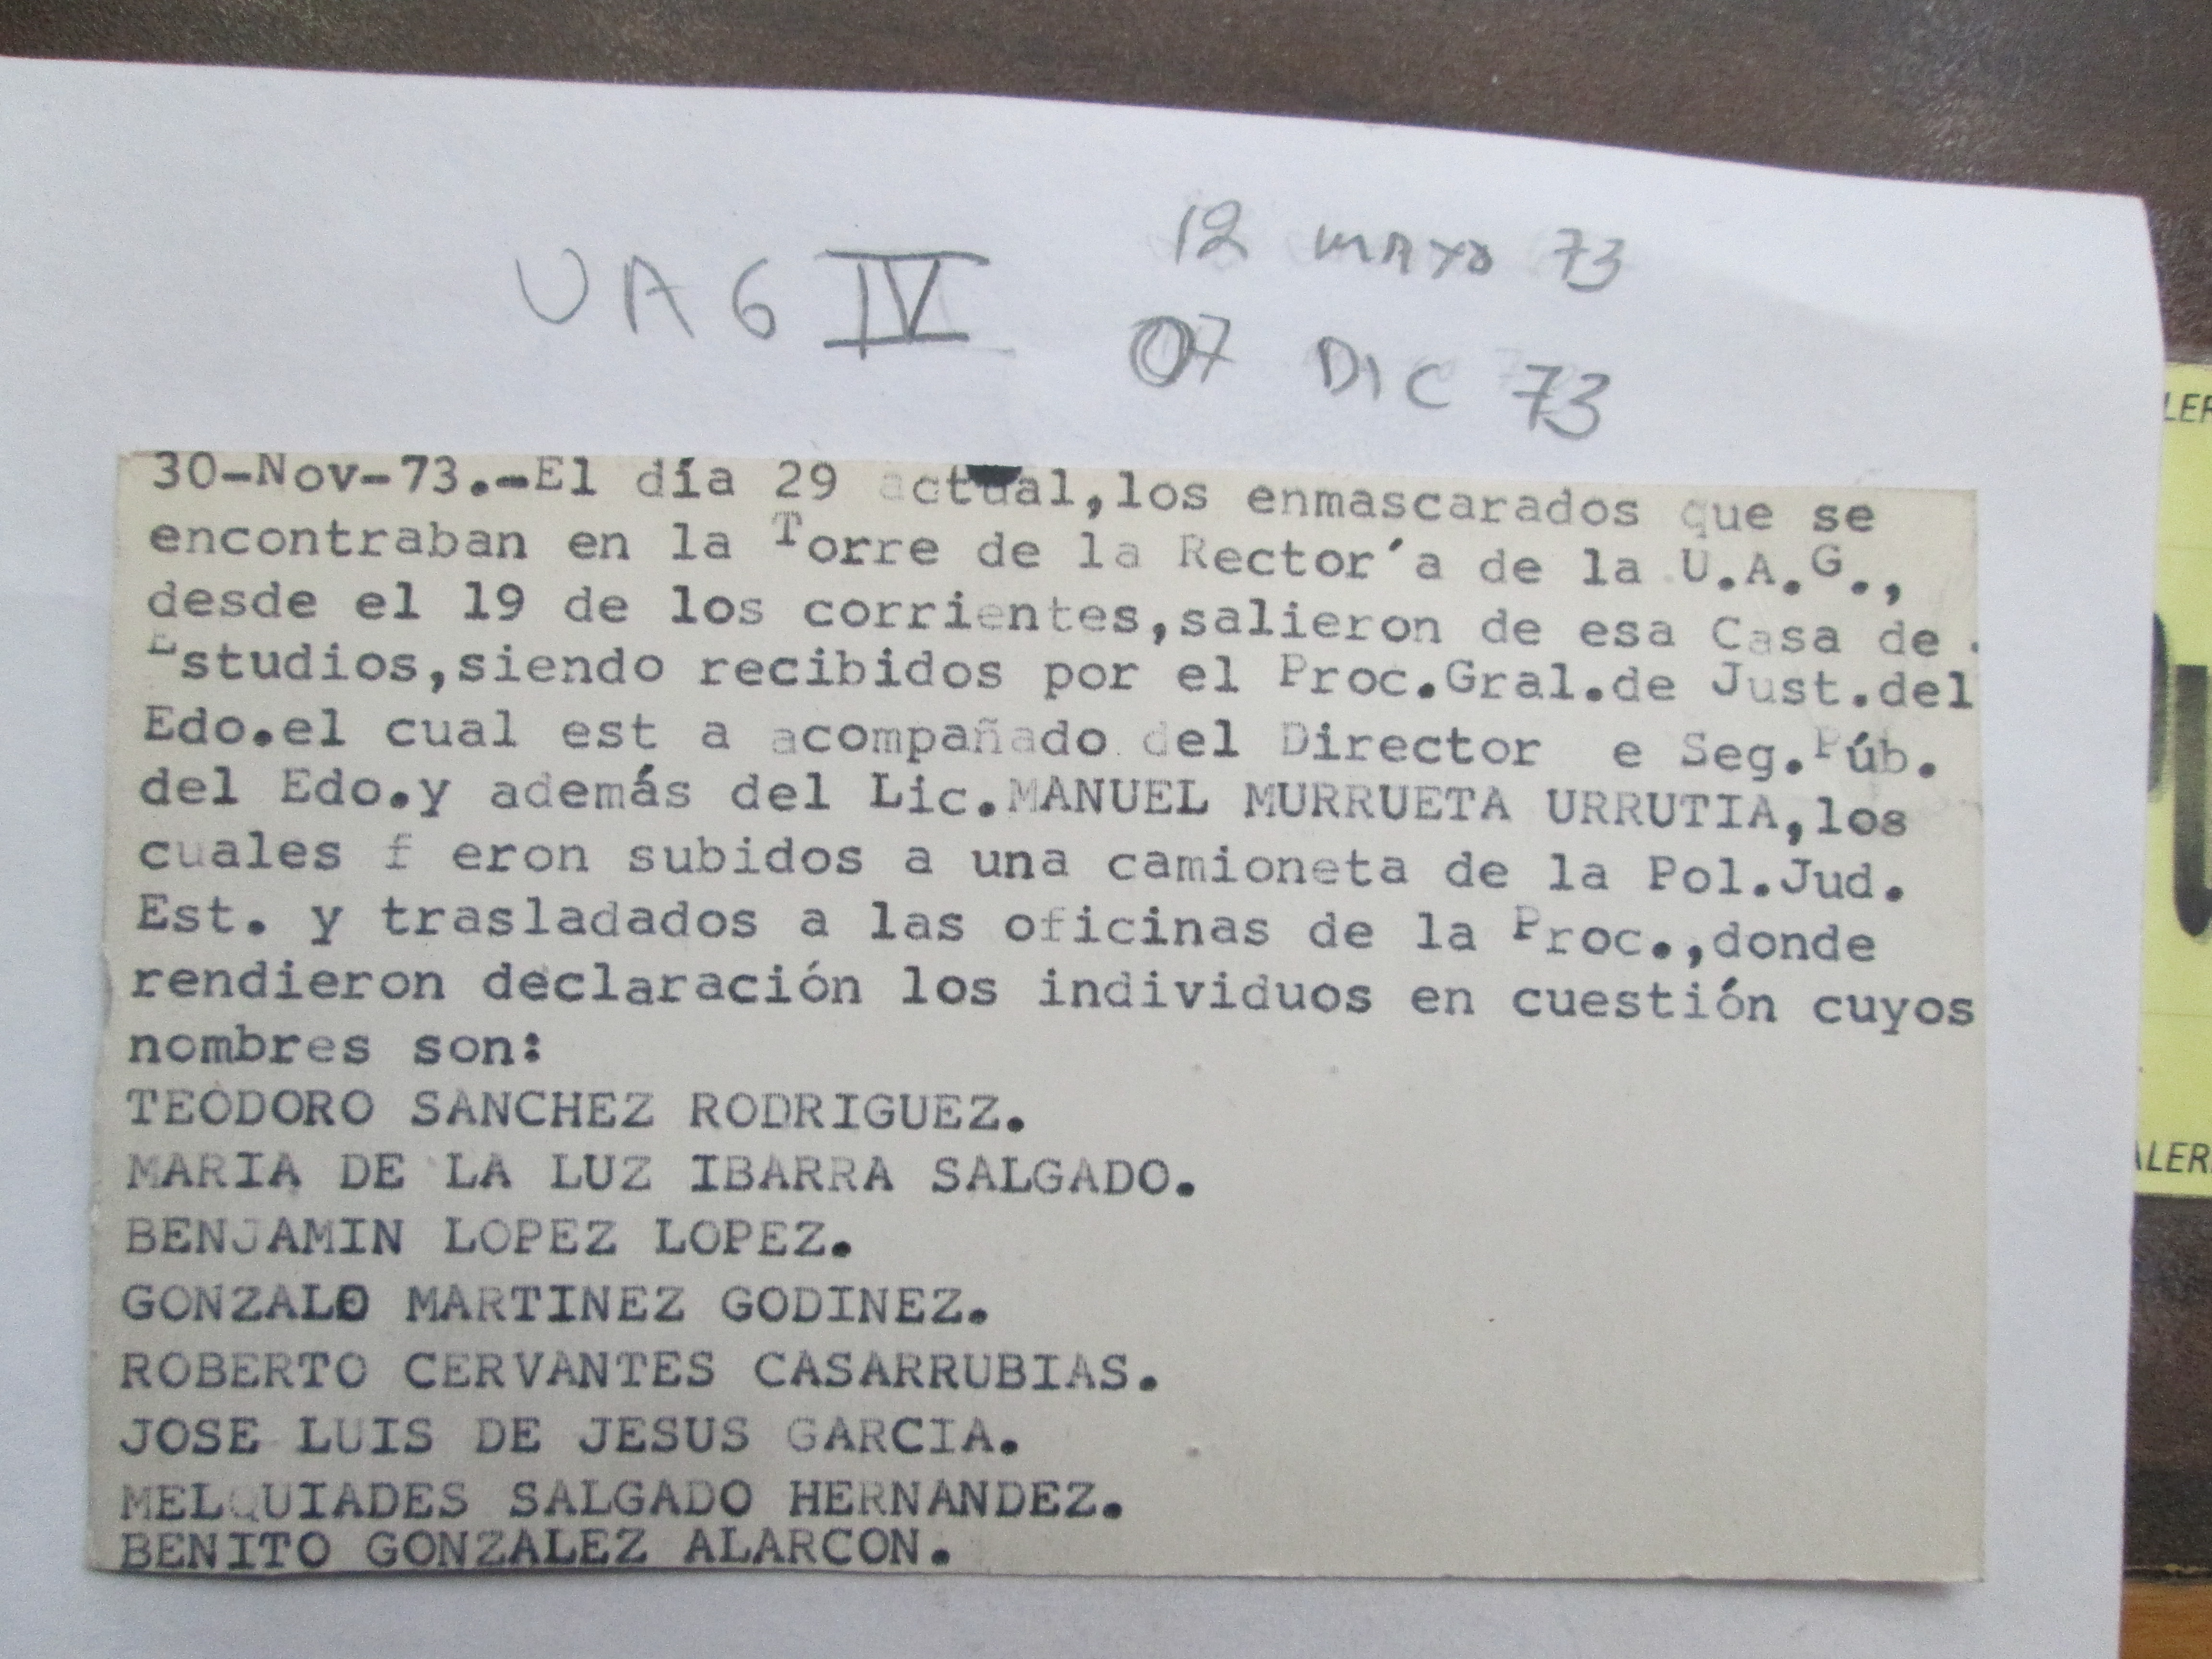

In [4]:
from IPython.display import Image, display
display(Image(files_sample[0]))

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install tesseract-ocr-spa
!pip install spacy
!python -m spacy download es_core_news_sm

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-spa is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     |████████████████████████████████| 16.2 MB 6.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [6]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
import csv
import os

In [7]:
!echo "" > results.csv

In [8]:
# Helper function to save the intermediate results 
def save_findings(extractedText, using12, originalFilename):
  # field names 
  row = [originalFilename, extractedText, using12]
          
  # name of csv file 
  filename = "results.csv"
      
  # writing to csv file 
  with open(filename, 'a+', newline='', encoding='utf-8') as csvfile: 
      csvwriter = csv.writer(csvfile) 
      csvwriter.writerow(row)

In [9]:
# Save headings the first time
save_findings("text", "textUsingPSM12", "filename")

In [10]:
# Gather information from OCR
# From docs we found that PSM 12 has OSD, henceforth is better suited to understand all the text.
# In the practice, the resulting text wasn't much better than the default parameters.
# https://github.com/tesseract-ocr/tesseract/blob/8d6dbb133b41/api/tesseractmain.cpp#L115

SUPPORTED_FORMATS = {
    'JPEG',
    'PNG',
    'PBM',
    'PGM',
    'PPM',
    'TIFF',
    'BMP',
    'GIF',
    'WEBP',
}

count = 0
for el in files_sample: 
  print("" + str(count) + " - Analizando ..." + el)
  currentImage = Image.open(el)
  if currentImage.format not in SUPPORTED_FORMATS:
    currentImage = currentImage.convert('RGB')
  extractedInformation = pytesseract.image_to_string(currentImage, lang='spa')
  extractedInformation2 = pytesseract.image_to_string(currentImage, lang='spa', config="--psm 12")
  save_findings(extractedInformation, extractedInformation2, el)
  count = count + 1

0 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG
1 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_Union_Campesina_Independiente,_fichas_UCI,_fichas-2-.JPG
2 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_PPUA_Fichas_PPUA,_Fichas-98-.JPG
3 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_Detenidos_Desaparecidos_Morales_Lopez_Delia_Morales_Lopez_Delia-23-.JPG
4 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-113-.JPG
5 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_Detenidos_Desaparecidos_Perez_Lopez_Martha_Perez_Lopez_Martha-21-.JPG
6 - Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_Olea_Castaneyra_Rafael,_ACNR-19-.JPG
7 - Anal

In [11]:
# Primer entregable (2.A): results.csv

# Limpieza

---

Limpieza de los datos previo a NER y búsqueda de patrones


In [12]:
df = pd.read_csv('results.csv', encoding='utf8')
df.head(5)

filename  ...                                     textUsingPSM12
0  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Ñ\n\nÉ\n\na\n\n“AR y)\n\nKe\n\nO\n\nA\n\n7\n\n...
1  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Dra\n\nde\n\nde\n\nCAM\n\nE je\n\nLTOR EN\n\n1...
2  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Le\n\nE\n\n$\n\na\n\nE\n\nLe á\n\n>\n\nO\n\n=\...
3  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  MORALES LOPEZ,Delia\n\nExpe11-235-75\n\nH-118 ...
4  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  /\n\nJA\n\nemo E\n\no\n\nÍX\n\nyá\n\nAA AL\n\n...

[5 rows x 3 columns]

In [13]:
!pip install unidecode

In [14]:
import nltk
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import re
import unidecode

nltk.download(['stopwords', 'wordnet'])
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  separated = unidecode.unidecode(sentence)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(separated)
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('spanish')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [16]:
# In order to clean the text we are going to process from the previous extracted tesseract step 
df['clean_text'] = df['text'].map(lambda s : preprocess(s))

# NER y datos relevantes
---
A continuación se muestran los datos obtenidos después del procesamiento NLP

In [17]:
import numpy as np

In [18]:
df['fpath'] = df['filename'].str.replace('drive/MyDrive/Datos - Hackathon JusticIA', '')
df['fname'] = df['fpath'].str.extract('/[A-Z]\w{0,}/(.*)', expand=True)
df['ftype'] = df['fpath'].str.extract('/([A-Z]\w{0,})/', expand=True)
print(df.head(5))

                                            filename  ...       ftype
0  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Evaluacion
1  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Evaluacion
2  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Evaluacion
3  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Evaluacion
4  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Evaluacion

[5 rows x 7 columns]


In [19]:
# Search for files
df['expedientes'] = df['text'].str.extract('(exp.*)', expand=True, flags=re.IGNORECASE)
print(df['expedientes'])

0                  NaN
1                  NaN
2                  NaN
3       Exp+e11-235-75
4    EXP» -100-10-1-77
5                  NaN
6                  NaN
7                  NaN
8                  NaN
9                  NaN
Name: expedientes, dtype: object


In [20]:
# Search for dates in the first format DD-MMM-AA
df['fechas_formato1'] = df['text'].str.extract(r'(\d*(?:\/|\-|\.)\s*(?:Ene(?:ro)?|Feb(?:rero)?|Mar(?:zo)?|Abr(?:il)?|May(?:o)?|Jun(?:io)?|Jul(?:io)?|Ago(?:sto)?|Sep(?:tiembre)?|Oct(?:ubre)?|Nov(?:iembre)?|Dic(?:iembre)?)(?:\/|\-|\.)\s*.\d*)', expand=True, flags=re.IGNORECASE)
print(df['fechas_formato1'].to_string())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN


In [21]:
# Search for dates in the format DD de MONTH
df['fechas_formato2'] = df['text'].str.extract(r'(\d{1,}\s*\w*\s*(?:Ene(?:ro)?|Feb(?:rero)?|Mar(?:zo)?|Abr(?:il)?|May(?:o)?|Jun(?:io)?|Jul(?:io)?|Ago(?:sto)?|Sep(?:tiembre)?|Oct(?:ubre)?|Nov(?:iembre)?|Dic(?:iembre)?))\d*\s*', expand=True, flags=re.IGNORECASE)
df['fechas_formato2'] = df['fechas_formato2'].map(lambda s : type(s) == str and s.strip() or np.nan)
print(df['fechas_formato2'].to_string())

0              NaN
1    28 de Octubre
2     24\n\njóvene
3              NaN
4              NaN
5              NaN
6         3\nenero
7              NaN
8              NaN
9        30 de Dic


In [29]:
# From here is NER
import spacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 
nlp = spacy.load("es_core_news_sm")

In [89]:
final_df = pd.DataFrame ([], columns = ['filename','label','class'])
final_df.head()

Empty DataFrame
Columns: [filename, label, class]
Index: []

In [90]:
# Helper function to use as lambda, here we nlp the text and find
# the labels, this may be more accurate with more cleaning
def save_ner(filename, text):
  global final_df
  analysis = nlp(text)
  clase = "Other"
  clases = ["PER", "LOC", "ORG"]
  for ent in analysis.ents:
    if (ent.label_ == "PER"):
      clase = "Persona"
    elif (ent.label_ == "LOC"):
      clase = "Lugar"
    elif (ent.label_ == "ORG"):
      clase = "Organización"
    else:
      clase = ent.label_

    data = {'filename': filename, 'label': ent.text, 'class': clase}
    if (ent.label_ in clases):
      final_df = final_df.append(data, ignore_index=True)
  
  return True


for filename, clean_text in zip(df['filename'], df['clean_text']):
  save_ner(filename, clean_text)

print(final_df.to_string())

                                                                                                                                         filename                                               label         class
0                                 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG                             mar pino nov dia cetmal         Lugar
1                                 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG                                         coa studios  Organización
2                                 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG                                     just edosel est       Persona
3                                 drive/MyDrive/Datos - Hackathon JusticIA/Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG       

In [92]:
for expediente, f1, f2 in zip(df['expedientes'], df['fechas_formato1'], df['fechas_formato2']):
  if expediente == expediente:
    exp = {'filename': filename, 'label': expediente, 'class': "Expediente"}
    final_df = final_df.append(exp, ignore_index=True)
  if f1 == f1:
    fecha1 = {'filename': filename, 'label': f1, 'class': "Fecha:formato_1"}
    final_df = final_df.append(fecha1, ignore_index=True)
  if f2 == f2:
    fecha2 = {'filename': filename, 'label': f2, 'class': "Fecha:formato_2"}
    final_df = final_df.append(fecha2, ignore_index=True)

display(final_df)

filename  ...            class
0   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...            Lugar
1   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...     Organización
2   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
3   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
4   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
5   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
6   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
7   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
8   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...            Lugar
9   drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
10  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
11  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
12  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
13  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
14  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
15  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
16  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
17  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
18  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...     Organización
19  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...     Organización
20  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
21  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
22  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...          Persona
23  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
24  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
25  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...       Expediente
26  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...       Expediente
27  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
28  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
29  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
30  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
31  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...       Expediente
32  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...       Expediente
33  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2
34  drive/MyDrive/Datos - Hackathon JusticIA/Evalu...  ...  Fecha:formato_2

[35 rows x 3 columns]

In [94]:
# Resultado Reto 2 B
final_df.to_csv('2B.csv', encoding='utf8')